In [1]:
from google.colab import files
uploaded = files.upload()

Saving Rainfall_data.csv to Rainfall_data.csv


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Rainfall_data.csv")

In [7]:
df.head()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000,1,1,8.06,48.25,23.93,0.00
1,2000,2,1,8.73,50.81,25.83,0.11
2,2000,3,1,8.48,42.88,26.68,0.01
3,2000,4,1,13.79,55.69,22.49,0.02
4,2000,5,1,17.40,70.88,19.07,271.14


In [25]:
summary_stats = df.describe()
summary_stats

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
count,252.000000,252.000000,252.0,252.000000,252.000000,252.000000,252.000000
mean,2010.000000,6.500000,1.0,14.416746,67.259524,16.317262,206.798929
std,6.067351,3.458922,0.0,4.382599,17.307101,6.584842,318.093091
min,2000.000000,1.000000,1.0,5.740000,34.690000,4.730000,0.000000
25%,2005.000000,3.750000,1.0,10.010000,51.845000,10.865000,0.402500
50%,2010.000000,6.500000,1.0,15.200000,66.655000,16.915000,11.495000
75%,2015.000000,9.250000,1.0,18.875000,84.610000,22.115000,353.200000
max,2020.000000,12.000000,1.0,20.570000,92.310000,29.340000,1307.430000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               252 non-null    int64  
 1   Month              252 non-null    int64  
 2   Day                252 non-null    int64  
 3   Specific Humidity  252 non-null    float64
 4   Relative Humidity  252 non-null    float64
 5   Temperature        252 non-null    float64
 6   Precipitation      252 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 13.9 KB


In [26]:
# Calculating Monthly and Yearly Aggregations
monthly_aggregations = df.groupby(['Year', 'Month']).agg({
    'Specific Humidity': 'mean',
    'Relative Humidity': 'mean',
    'Temperature': 'mean',
    'Precipitation': 'sum'
}).reset_index()

yearly_aggregations = df.groupby('Year').agg({
    'Specific Humidity': 'mean',
    'Relative Humidity': 'mean',
    'Temperature': 'mean',
    'Precipitation': 'sum'
}).reset_index()

# Yearly Trend
yearly_trend = yearly_aggregations[['Year', 'Precipitation']]

# Monthly Trend
monthly_trend = monthly_aggregations[['Year', 'Month', 'Precipitation']]

# Printing Results
print("Summary Statistics:")
print(summary_stats)

print("\nMonthly Aggregations:")
print(monthly_aggregations)

print("\nYearly Aggregations:")
print(yearly_aggregations)

print("\nYearly Trend in Precipitation:")
print(yearly_trend)

print("\nMonthly Trend in Precipitation:")
print(monthly_trend)

Summary Statistics:
              Year       Month    Day  Specific Humidity  Relative Humidity  \
count   252.000000  252.000000  252.0         252.000000         252.000000   
mean   2010.000000    6.500000    1.0          14.416746          67.259524   
std       6.067351    3.458922    0.0           4.382599          17.307101   
min    2000.000000    1.000000    1.0           5.740000          34.690000   
25%    2005.000000    3.750000    1.0          10.010000          51.845000   
50%    2010.000000    6.500000    1.0          15.200000          66.655000   
75%    2015.000000    9.250000    1.0          18.875000          84.610000   
max    2020.000000   12.000000    1.0          20.570000          92.310000   

       Temperature  Precipitation  
count   252.000000     252.000000  
mean     16.317262     206.798929  
std       6.584842     318.093091  
min       4.730000       0.000000  
25%      10.865000       0.402500  
50%      16.915000      11.495000  
75%      22.1150

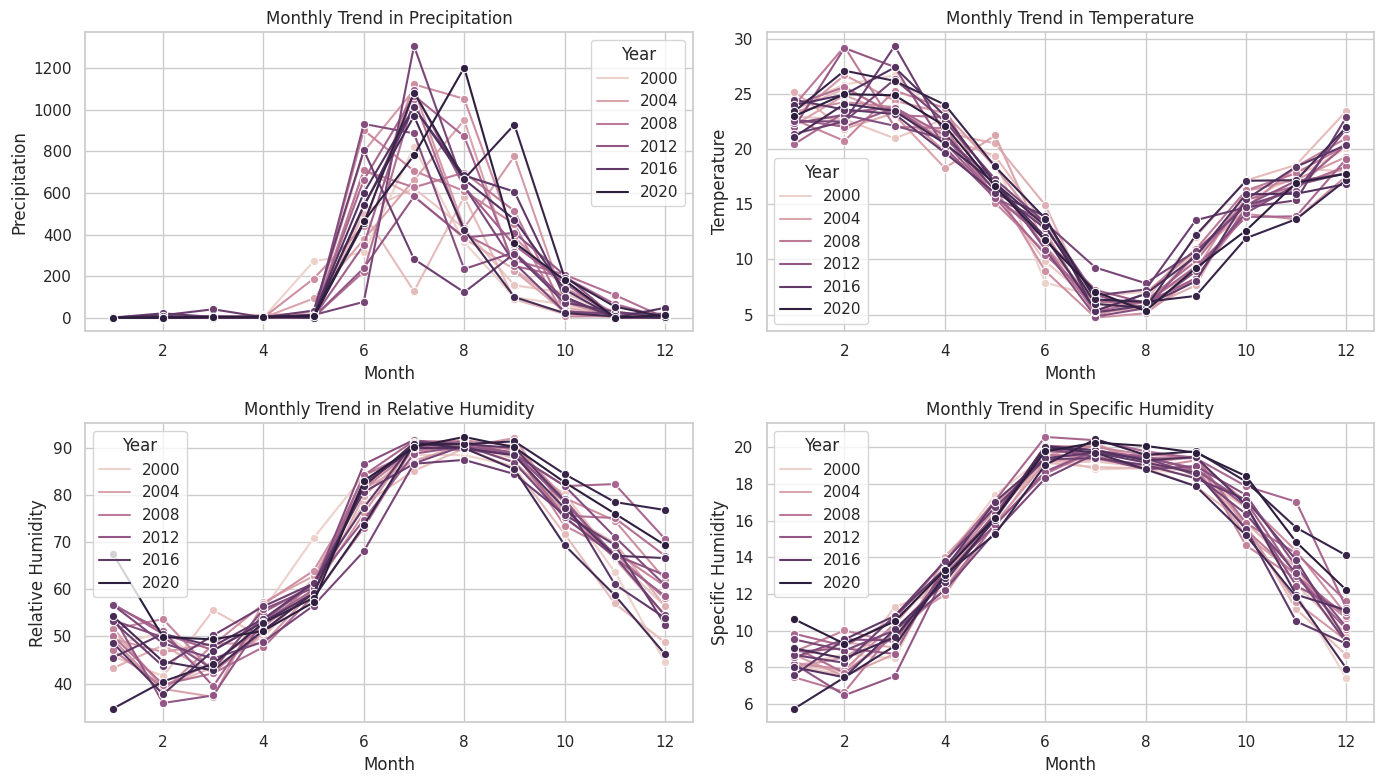

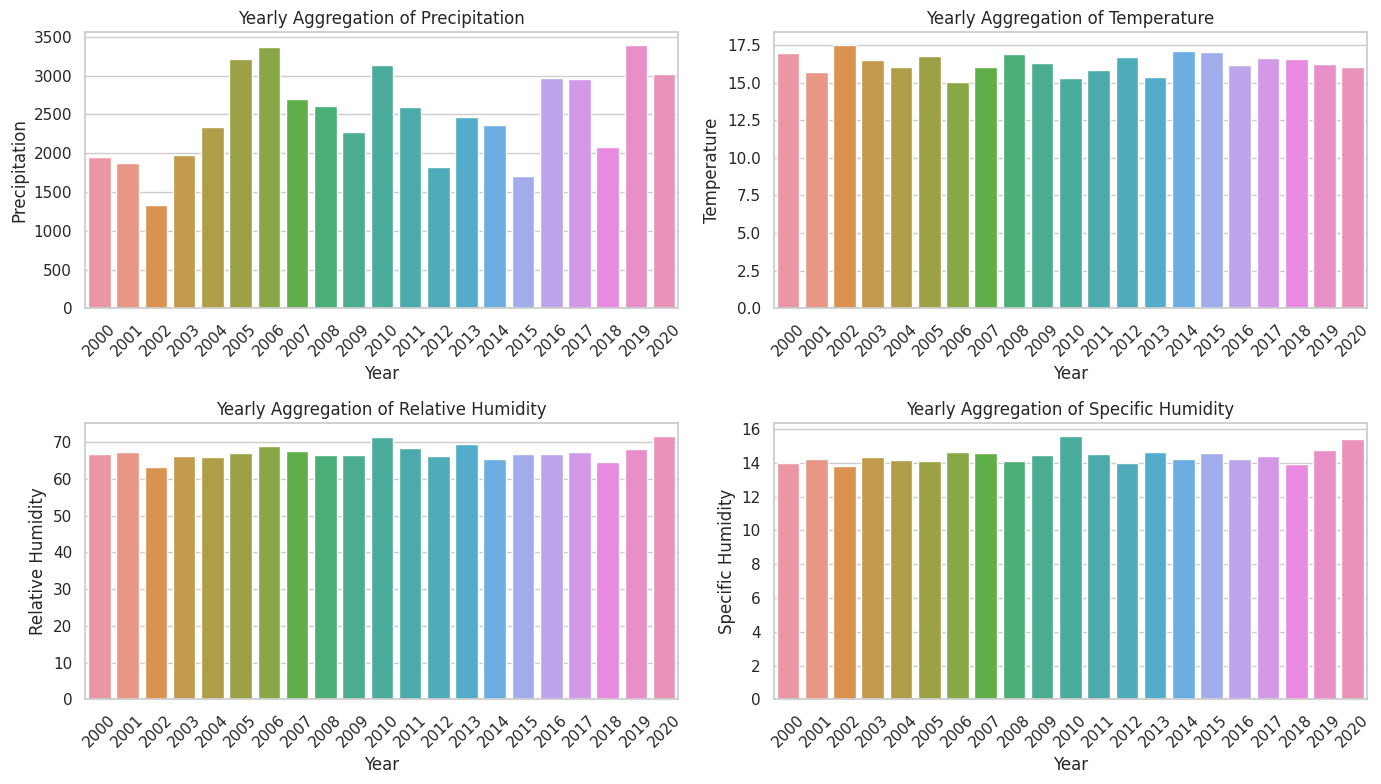

In [28]:
# Plotting Monthly Aggregations
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.lineplot(x='Month', y='Precipitation', hue='Year', data=monthly_aggregations, marker='o')
plt.title('Monthly Trend in Precipitation')
plt.xlabel('Month')
plt.ylabel('Precipitation')

plt.subplot(2, 2, 2)
sns.lineplot(x='Month', y='Temperature', hue='Year', data=monthly_aggregations, marker='o')
plt.title('Monthly Trend in Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.subplot(2, 2, 3)
sns.lineplot(x='Month', y='Relative Humidity', hue='Year', data=monthly_aggregations, marker='o')
plt.title('Monthly Trend in Relative Humidity')
plt.xlabel('Month')
plt.ylabel('Relative Humidity')

plt.subplot(2, 2, 4)
sns.lineplot(x='Month', y='Specific Humidity', hue='Year', data=monthly_aggregations, marker='o')
plt.title('Monthly Trend in Specific Humidity')
plt.xlabel('Month')
plt.ylabel('Specific Humidity')

plt.tight_layout()
plt.show()

# Plotting Yearly Aggregations
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.barplot(x='Year', y='Precipitation', data=yearly_aggregations)
plt.title('Yearly Aggregation of Precipitation')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.xticks(rotation=45)


plt.subplot(2, 2, 2)
sns.barplot(x='Year', y='Temperature', data=yearly_aggregations)
plt.title('Yearly Aggregation of Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.xticks(rotation=45)


plt.subplot(2, 2, 3)
sns.barplot(x='Year', y='Relative Humidity', data=yearly_aggregations)
plt.title('Yearly Aggregation of Relative Humidity')
plt.xlabel('Year')
plt.ylabel('Relative Humidity')
plt.xticks(rotation=45)


plt.subplot(2, 2, 4)
sns.barplot(x='Year', y='Specific Humidity', data=yearly_aggregations)
plt.title('Yearly Aggregation of Specific Humidity')
plt.xlabel('Year')
plt.ylabel('Specific Humidity')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

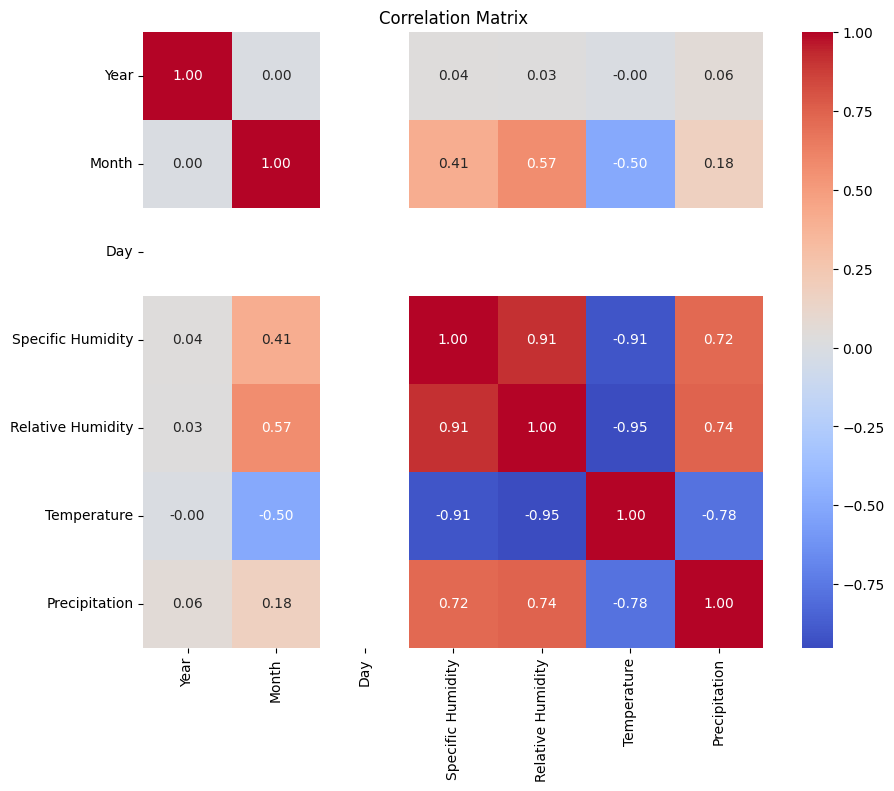

In [13]:
# Plotting a correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

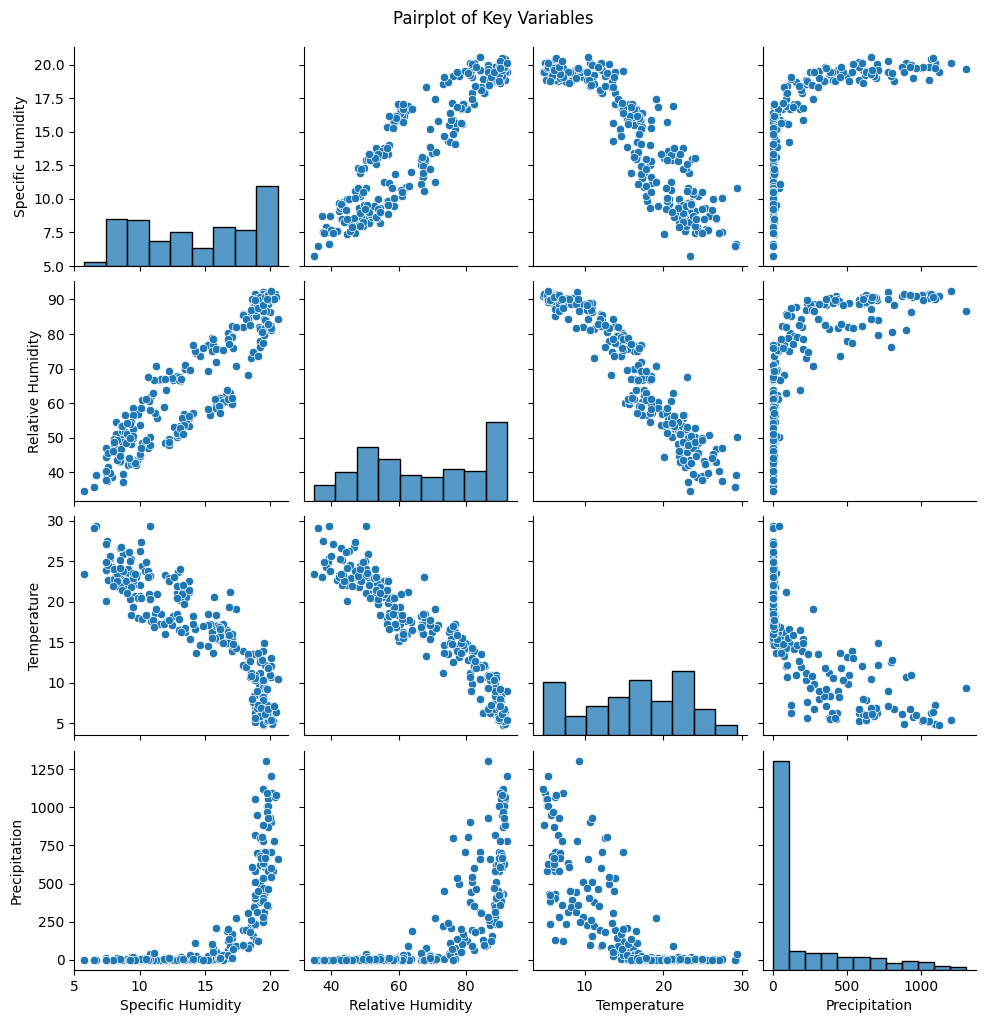

In [14]:
sns.pairplot(df[['Specific Humidity', 'Relative Humidity', 'Temperature', 'Precipitation']])
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

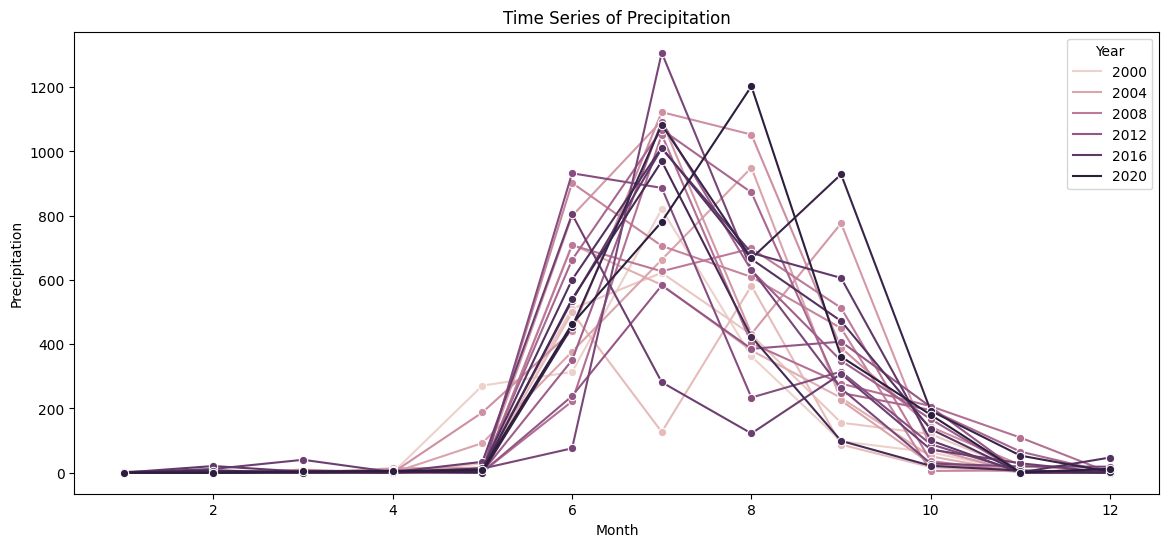

In [15]:
# Ploting a time series of precipitation
plt.figure(figsize=(14, 6))
sns.lineplot(x='Month', y='Precipitation', data=df, marker='o', hue='Year')
plt.title('Time Series of Precipitation')
plt.xlabel('Month')
plt.ylabel('Precipitation')
plt.show()

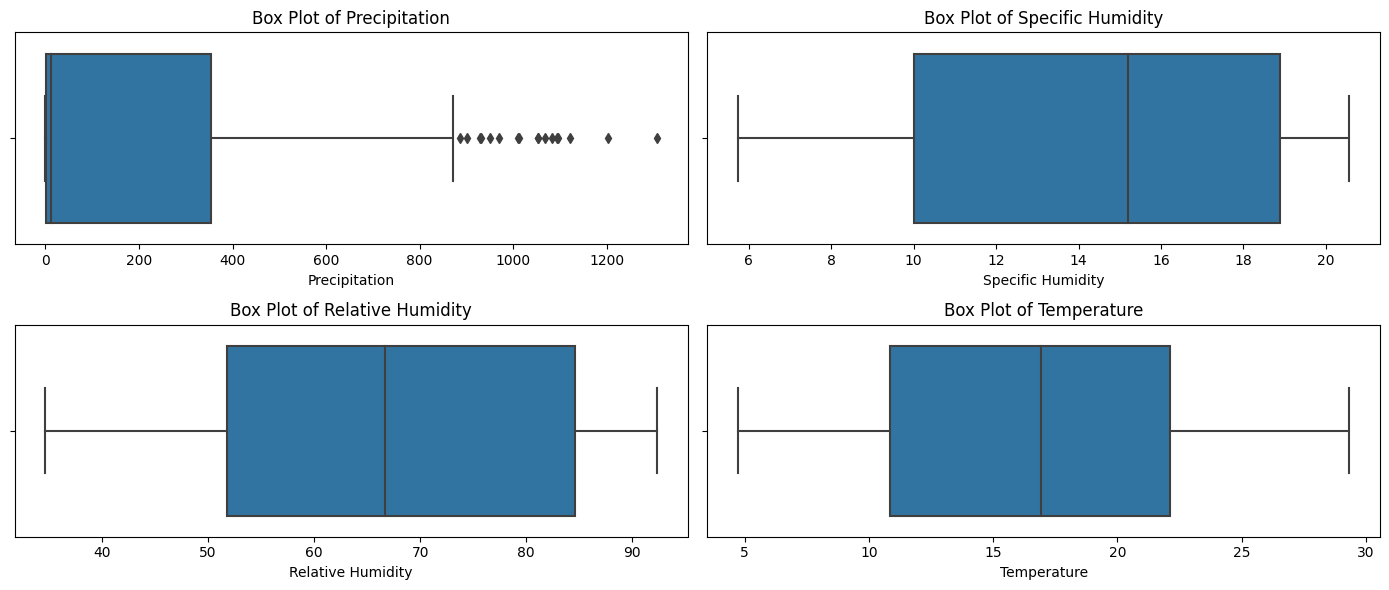

In [17]:
# Box plots for key variables
plt.figure(figsize=(14, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='Precipitation', data=df)
plt.title('Box Plot of Precipitation')

plt.subplot(2, 2, 2)
sns.boxplot(x='Specific Humidity', data=df)
plt.title('Box Plot of Specific Humidity')

plt.subplot(2, 2, 3)
sns.boxplot(x='Relative Humidity', data=df)
plt.title('Box Plot of Relative Humidity')

plt.subplot(2, 2, 4)
sns.boxplot(x='Temperature', data=df)
plt.title('Box Plot of Temperature')

plt.tight_layout()
plt.show()

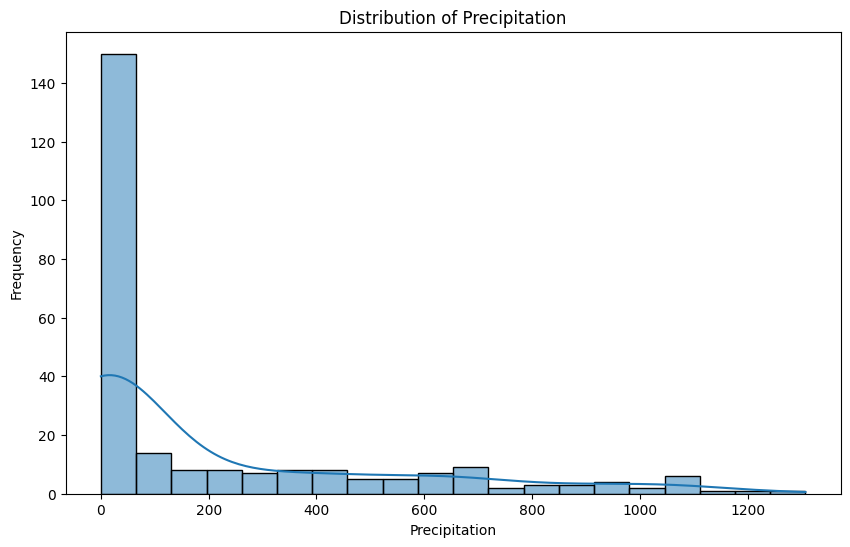

In [18]:
# Distribution plot for Precipitation
plt.figure(figsize=(10, 6))
sns.histplot(df['Precipitation'], bins=20, kde=True)
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.show()

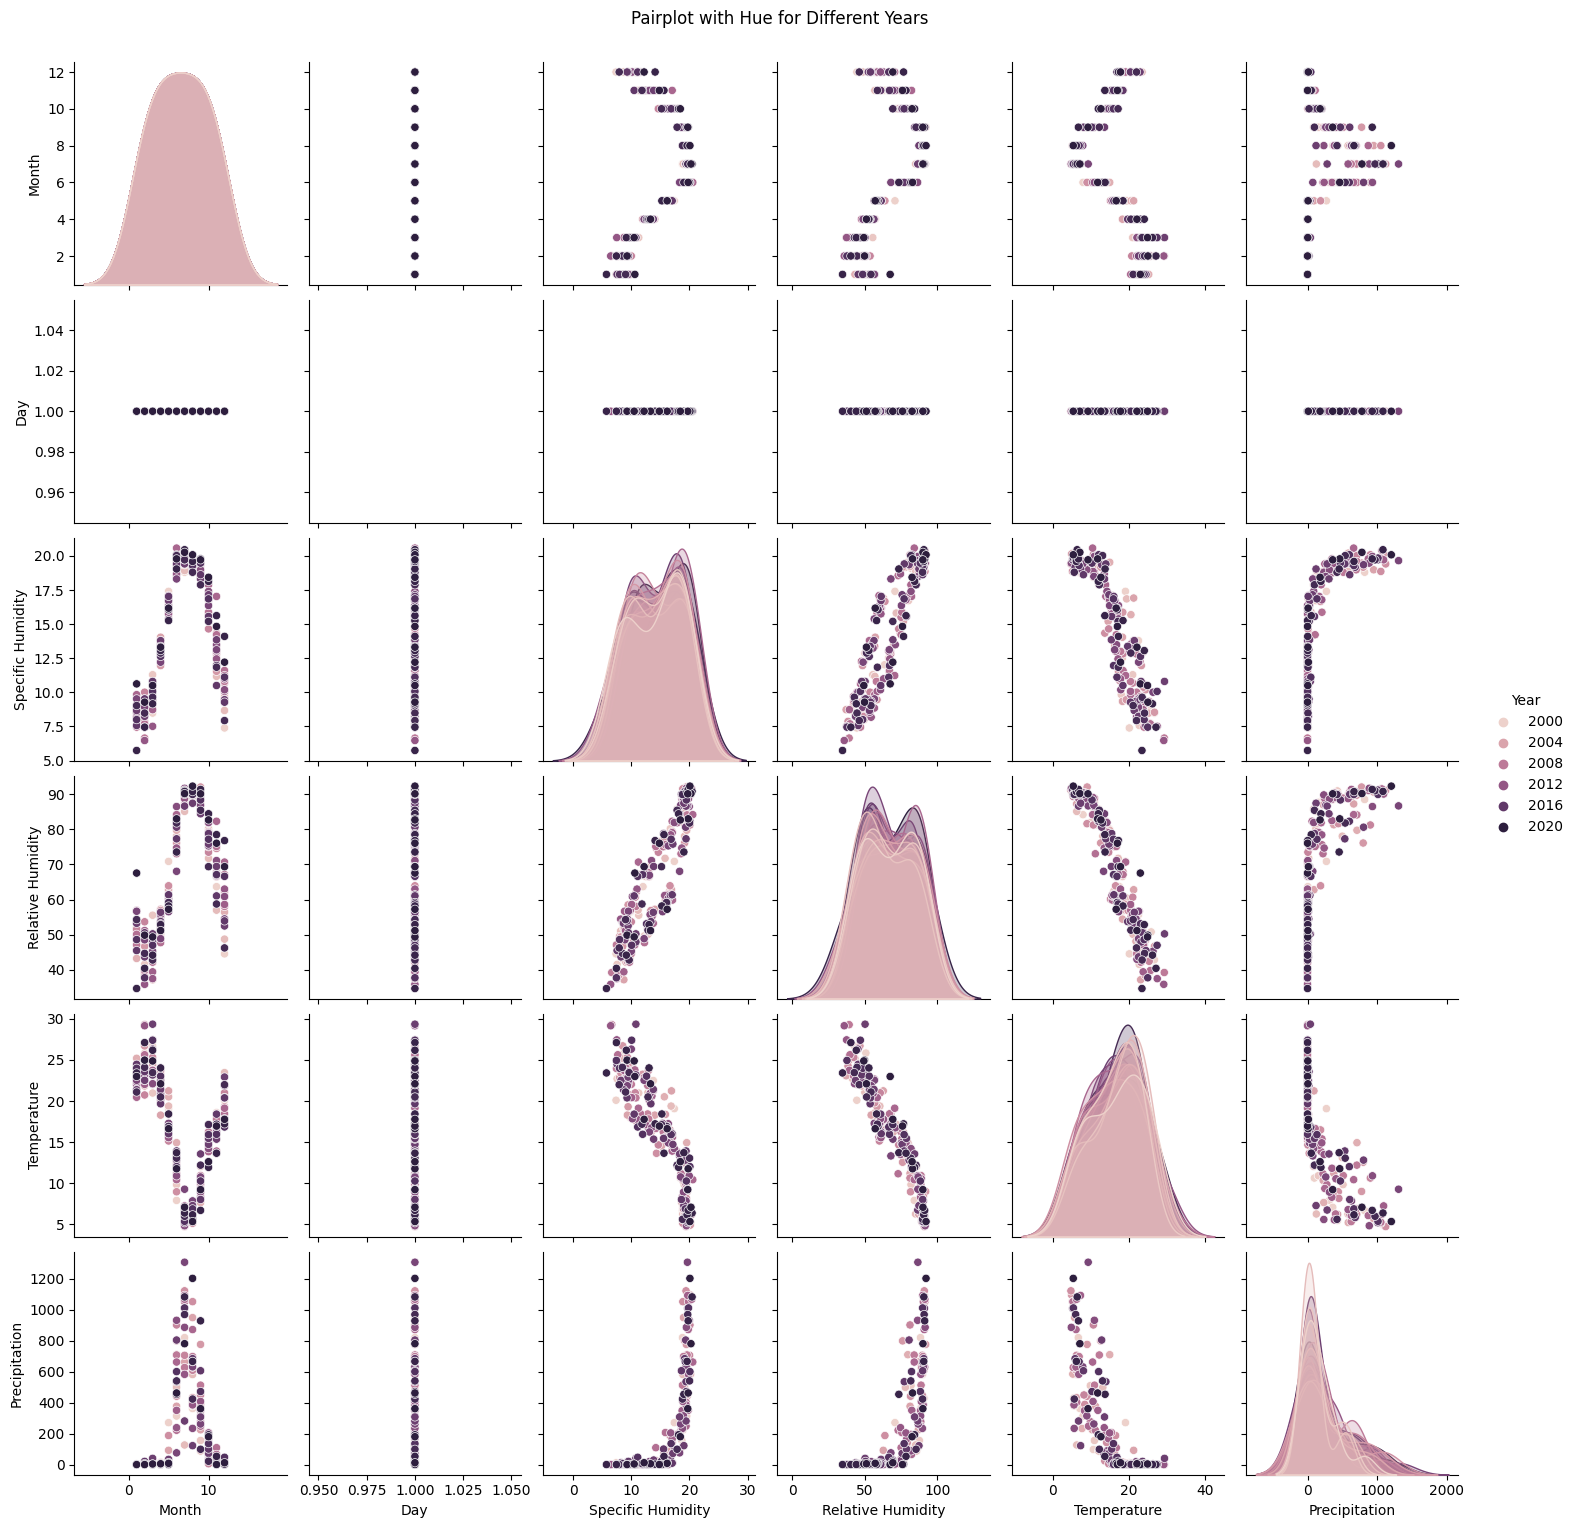

In [21]:
# Pairplot with hue for different years
sns.pairplot(df, hue='Year', height=2.5)
plt.suptitle('Pairplot with Hue for Different Years', y=1.02)
plt.show()

In [29]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

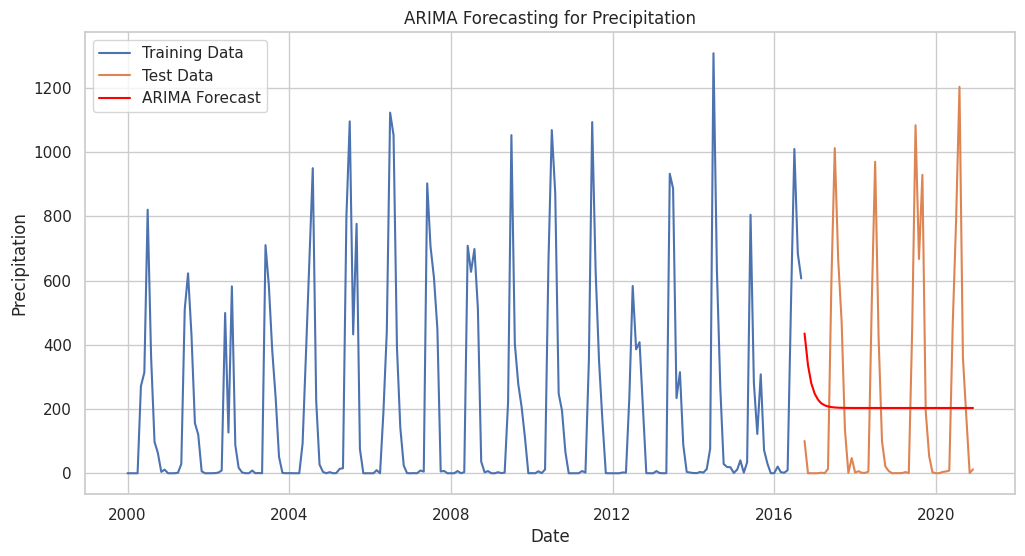

Mean Squared Error (MSE): 124136.78
Root Mean Squared Error (RMSE): 352.33


In [34]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1))

# Setting the Date column as the index
df.set_index('Date', inplace=True)

# Extracting Precipitation as the target variable
precipitation_series = df['Precipitation']

# Splitting the data into training and testing sets
train_size = int(len(precipitation_series) * 0.8)
train, test = precipitation_series[:train_size], precipitation_series[train_size:]

# Fitting ARIMA model
order = (1, 1, 1)  # (p, d, q) parameters of ARIMA
model = ARIMA(train, order=order)
fit_model = model.fit()

# Forecasting the test set
forecast_values = fit_model.forecast(steps=len(test))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast_values, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecasting for Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

# Evaluating the model
mse = mean_squared_error(test, forecast_values)
rmse = sqrt(mse)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


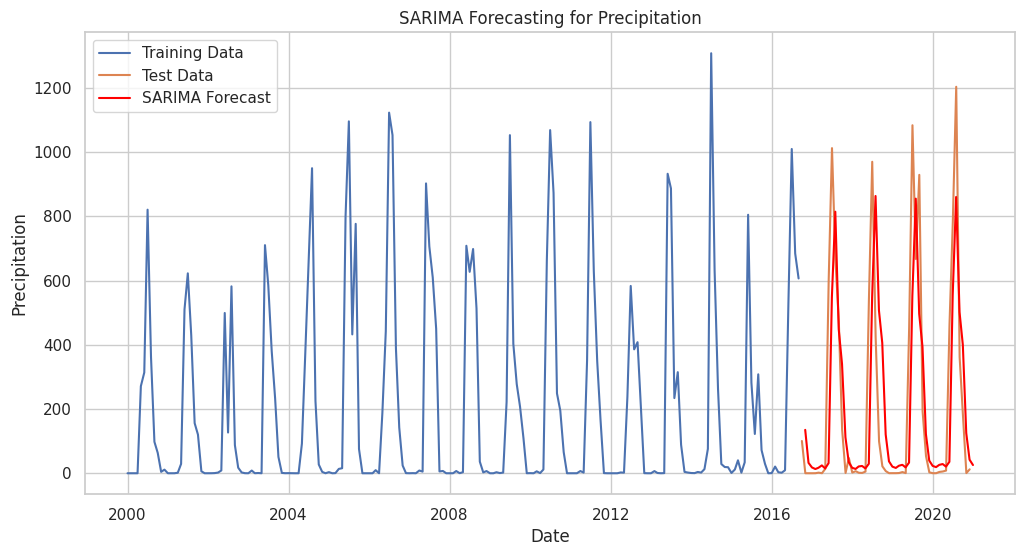

Mean Squared Error (MSE): 22333.03
Root Mean Squared Error (RMSE): 149.44


In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Combining Year, Month, and Day columns into a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1))

# Setting the Date column as the index
df.set_index('Date', inplace=True)

# Extracting Precipitation as the target variable
precipitation_series = df['Precipitation']

# Splitting the data into training and testing sets
train_size = int(len(precipitation_series) * 0.8)
train, test = precipitation_series[:train_size], precipitation_series[train_size:]

# Fitting SARIMA model
order = (1, 1, 1)  # Non-seasonal order
seasonal_order = (1, 1, 1, 12)  # Seasonal order with a period of 12 (monthly data)

model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
fit_model = model.fit(disp=False)

# Forecastinf the test set
forecast_values = fit_model.get_forecast(steps=len(test))
forecast_index = pd.date_range(start=test.index[0], periods=len(test), freq='M')
forecast_values = pd.Series(forecast_values.predicted_mean.values, index=forecast_index)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_values.index, forecast_values, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecasting for Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

# Evaluating the model
mse = mean_squared_error(test, forecast_values)
rmse = sqrt(mse)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Epoch 1/50
8/8 [==============================] - 7s 26ms/step - loss: 0.0736
Epoch 2/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0642
Epoch 3/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0605
Epoch 4/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0583
Epoch 5/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0542
Epoch 6/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0491
Epoch 7/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0399
Epoch 8/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0318
Epoch 9/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0299
Epoch 10/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0313
Epoch 11/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0284
Epoch 12/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0259
Epoch 13/50
8/8 [==============================] - 0s 16ms/st

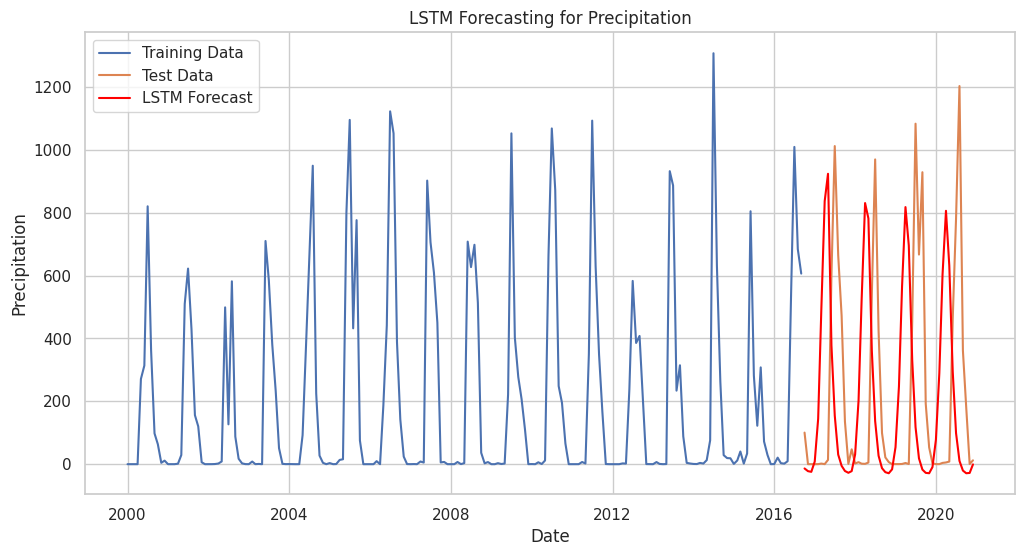

Mean Squared Error (MSE): 258407.69
Root Mean Squared Error (RMSE): 508.34


In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


# Combining Year, Month, and Day columns into a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1))

# Setting the Date column as the index
df.set_index('Date', inplace=True)

# Extracting Precipitation as the target variable
precipitation_series = df['Precipitation'].values.reshape(-1, 1)

# Normalizing the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
precipitation_series_scaled = scaler.fit_transform(precipitation_series)

# Functioning to create time series sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(y)

# Defineing the sequence length
sequence_length = 12  # You can experiment with different values

# Creating sequences for training
X_train, y_train = create_sequences(precipitation_series_scaled, sequence_length)

# Reshaping data for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Create sequences for testing
test_inputs = precipitation_series_scaled[-sequence_length:]
test_inputs = test_inputs.reshape((1, sequence_length, 1))  # Ensure the correct shape

# Predicting the precipitation for the test set
predictions = []

for _ in range(len(test)):
    prediction = model.predict(test_inputs)
    predictions.append(prediction[0, 0])
    test_inputs = np.append(test_inputs[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Inverse transform the predictions to the original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Ploting the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[:-len(test)], precipitation_series[:-len(test)], label='Training Data')
plt.plot(df.index[-len(test):], precipitation_series[-len(test):], label='Test Data')
plt.plot(df.index[-len(test):], predictions, label='LSTM Forecast', color='red')
plt.title('LSTM Forecasting for Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

# Evaluating the model
mse = mean_squared_error(precipitation_series[-len(test):], predictions)
rmse = sqrt(mse)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

In [ ]:
#Result Comparision: Lower values for RMSE are better, indicating that the model's predictions are closer to the actual values.
#In this particular scenerio:
# 1.ARIMA: It may struggleD with capturing complex non-linear patterns in the data, since strong seasonality or trends were involved.
# 2.SARIMA: The SARIMA model seems to perform better than ARIMA, which indicates that seasonality plays a significant role in the precipitation data.
# 3.LSTM: In this case, the LSTM model has a higher RMSE compared to ARIMA and SARIMA, suggesting that it may not be capturing the patterns in the data as effectively it requires more data and tuning of hyperparameters to perform well.